## <font color=#00B0BA>Group 2 Class C

- Livia Novita Gianto 23102010003
- Felix Budhi Santoso 23102010028
- Nathania Gunawan 23102010070
- Alina Florencia Karuniawati 23102010073
- Andrea Nathania 23102010092


## <font color=#00B0BA>Import Package

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## <font color=#00B0BA>Overview Overall Data

In [2]:
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
198838,2022-04-16,ZW,Zimbabwe,AFRO,29,247237,0,5462
198839,2022-04-17,ZW,Zimbabwe,AFRO,24,247261,0,5462
198840,2022-04-18,ZW,Zimbabwe,AFRO,17,247278,1,5463
198841,2022-04-19,ZW,Zimbabwe,AFRO,19,247297,1,5464


Data ini diambil dari https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths. Data ini merupakan data yang terdiri dari jumlah kasus harian, total kasus kumulatif, jumlah kematian harian, total kematian kumulatif dari persebaran COVID-19 dari berbagai negara. Data ini memuat data dari tanggal 1 Maret 2020 sampai dengan 20 April 2022  

Keterangan:
- Date_reported: tahun-bulan-tanggal
- Country_code: inisial negara
- Country: nama negara
- WHO_region: region WHO
- New_cases: jumlah kasus harian (dalam satuan banyak orang)
- Cumulative_cases: jumlah kasus kumulatif (dalam satuan banyak orang)
- New_deaths: jumlah kematian harian (dalam satuan banyak orang)
- Cumulative_deaths: jumlah kematian kumulatif (dalam satuan banyak orang)

## <font color=#00B0BA>Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198843 entries, 0 to 198842
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      198843 non-null  object
 1   Country_code       198004 non-null  object
 2   Country            198843 non-null  object
 3   WHO_region         198843 non-null  object
 4   New_cases          198843 non-null  int64 
 5   Cumulative_cases   198843 non-null  int64 
 6   New_deaths         198843 non-null  int64 
 7   Cumulative_deaths  198843 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.1+ MB


Dari informasi di atas dapat dilihat bahwa kolom Date_reported memiliki tipe data yang tidak sesuai, sehingga perlu diubah tipe datanya menjadi datetime

### <font color=#B30019>Change the Data Type

In [4]:
df['Date_reported']=pd.to_datetime(df['Date_reported'])

### <font color=#B30019>Correlation Between Variables

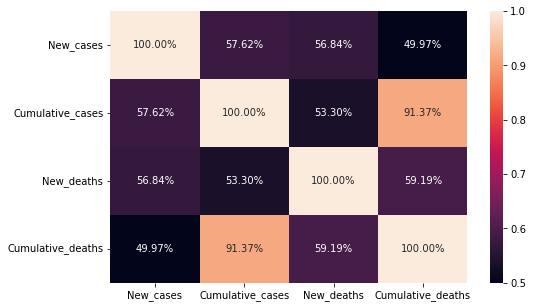

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

Dari Correlation Heat Map di atas, dapat terlihat bahwa terdapat hubungan yang positif antar variabel. Hal ini mengindikasikan bahwa hubungan antara dependent variabel dan independent variabel berbanding lurus. Hubungan antara independent variabel dan dependent variabel yang paling kuat adalah Cumulative_cases (X) dan Cumulative_deaths (Y) dimana angka korelasinya sebesar 91.37% (di atas 75%).

### <font color=#B30019>Remove Unnecessary Column

In [6]:
df1= df[['Date_reported','Country','Cumulative_cases', 'Cumulative_deaths']]
df1

,Date_reported,Country,Cumulative_cases,Cumulative_deaths
0,2020-01-03,Afghanistan,0,0
1,2020-01-04,Afghanistan,0,0
2,2020-01-05,Afghanistan,0,0
3,2020-01-06,Afghanistan,0,0
4,2020-01-07,Afghanistan,0,0
...,...,...,...,...
198838,2022-04-16,Zimbabwe,247237,5462
198839,2022-04-17,Zimbabwe,247261,5462
198840,2022-04-18,Zimbabwe,247278,5463
198841,2022-04-19,Zimbabwe,247297,5464


## <font color=#00B0BA>Filtering Data

In [7]:
df2 = df1[df1['Date_reported']=='2022-04-20']
df2=df2.sort_values(['Cumulative_cases'], ascending=[False]).head(5)
df2 = df2.set_index('Country')
df2

,Date_reported,Cumulative_cases,Cumulative_deaths
Country,,,
United States of America,2022-04-20,79944656,981834
India,2022-04-20,43047594,522006
Brazil,2022-04-20,30261088,662026
France,2022-04-20,27027167,141007
Germany,2022-04-20,23658211,133308


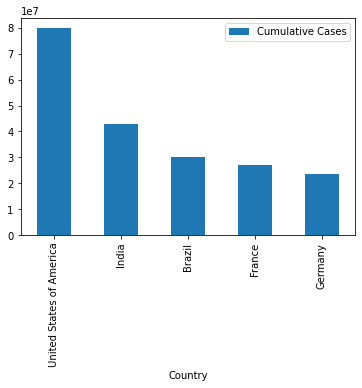

In [8]:
ax = df2[['Cumulative_cases']].plot(kind='bar')
ax.legend(["Cumulative Cases"])
plt.show()

Dari diagram diatas, dapat dilihat data 5 negara dengan total kasus kumulatif terbanyak yaitu USA, India, Brazil, France dan Germany. Dalam hal ini kami tertarik untuk melakukan analisis terhadap negara Germany karena berdasarkan berita dari https://www.freepressjournal.in/world/covid-19-germany-france-south-korea-report-highest-cases-globally-check-full-list-here-3, Jerman merupakan negara yang sekarang ini sedang mengalami ledakan kasus COVID-19 yang sangat tinggi secara global.

### <font color=#B30019>Remove Other Countries Except Germany

In [9]:
df3 = df1[df1['Country']=='Germany']

In [10]:
df3

,Date_reported,Country,Cumulative_cases,Cumulative_deaths
65442,2020-01-03,Germany,0,0
65443,2020-01-04,Germany,1,0
65444,2020-01-05,Germany,1,0
65445,2020-01-06,Germany,1,0
65446,2020-01-07,Germany,1,0
...,...,...,...,...
66276,2022-04-16,Germany,23443414,133279
66277,2022-04-17,Germany,23490420,133284
66278,2022-04-18,Germany,23520187,133290
66279,2022-04-19,Germany,23550701,133296


### <font color=#B30019>Remove 2020's Data

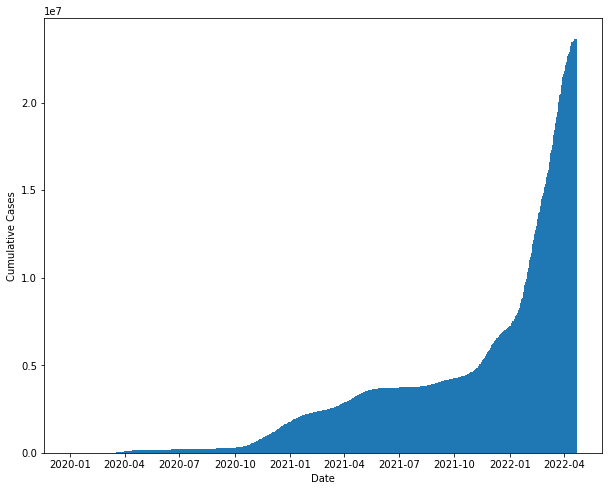

In [11]:
plt.figure(figsize=(10,8))
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
 
plt.bar(df3['Date_reported'], df3["Cumulative_cases"], width=5)
plt.show()

Dalam analisis ini, kami memutuskan untuk menggunakan data dari 1 Januari 2021 hingga 4 April 2022 karena berdasarkan grafik di atas peningkatan total kasus kumulatif yang signifikan di mulai pada Januari 2021 hingga saat ini (April 2022)

In [12]:
df3 = df3[df3['Date_reported']>'2020-12-31']
df3

,Date_reported,Country,Cumulative_cases,Cumulative_deaths
65806,2021-01-01,Germany,1754442,51068
65807,2021-01-02,Germany,1764716,51483
65808,2021-01-03,Germany,1774734,52074
65809,2021-01-04,Germany,1783570,52570
65810,2021-01-05,Germany,1797879,53347
...,...,...,...,...
66276,2022-04-16,Germany,23443414,133279
66277,2022-04-17,Germany,23490420,133284
66278,2022-04-18,Germany,23520187,133290
66279,2022-04-19,Germany,23550701,133296


## <font color=#00B0BA>Overview Data For Simple Linear Regression

In [13]:
df3

,Date_reported,Country,Cumulative_cases,Cumulative_deaths
65806,2021-01-01,Germany,1754442,51068
65807,2021-01-02,Germany,1764716,51483
65808,2021-01-03,Germany,1774734,52074
65809,2021-01-04,Germany,1783570,52570
65810,2021-01-05,Germany,1797879,53347
...,...,...,...,...
66276,2022-04-16,Germany,23443414,133279
66277,2022-04-17,Germany,23490420,133284
66278,2022-04-18,Germany,23520187,133290
66279,2022-04-19,Germany,23550701,133296


Data yang digunakan untuk regresi linear adalah data perseberan Covid-19 di German dari 1 Januari 2021 hingga 20 April 2022 dengan variabel dependen (Y) Cumulative_deaths (dalam satuan banyak orang) dan variabel independen (X) Cumulative_cases (dalam satuan banyak orang)

## <font color=#00B0BA>Data Visualization


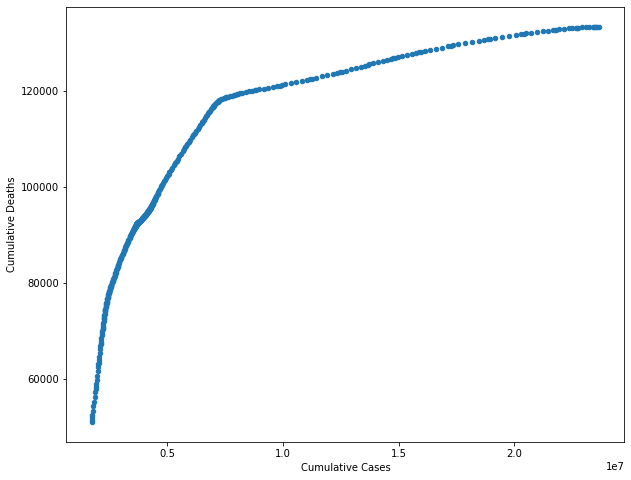

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))  #menunjukkan ukuran dari plot
df3.plot(x="Cumulative_cases",y="Cumulative_deaths",ax=ax,kind="scatter")
plt.xlabel("Cumulative Cases")
plt.ylabel("Cumulative Deaths")
plt.show()

Dari scatter plot di atas dapat dilihat bahwa Cumulative Cases dan Cumulative Deaths berkorelasi positif sehingga ketika Cumulative Case meningkat, Cumulative Death juga meningkat. 

## <font color=#00B0BA> Linear Regression

### <font color=#B30019> Create and Fit Model

In [15]:
LR = LinearRegression()

In [16]:
X = df3[['Cumulative_cases']]
y = df3[['Cumulative_deaths']]

In [17]:
model = LR.fit(X,y) # membuat model dari linear regression berdasarkan independent and dependent variable
r_sq = model.score(X, y)

In [18]:
print('Coefficient of determination (R^2):', r_sq)  #mengeluarkan hasil perhitungannya dengan template
print('intercept:', model.intercept_[0])
print('slope:', model.coef_[0][0])

Coefficient of determination (R^2): 0.7212792544625621
intercept: 79259.15305627784
slope: 0.0030237873953954664


1. Interpretation of slope: One unit increment in Cumulative Cases increase the Cumulative Deaths by 0.00302
2. Interpretation of intercept: The starting Cumulative Deaths when Cumulative Cases is 0 is 79259.15
3. Interpretation of coefficient of determination: The result of coefficient determination shows that 72.13% of the total variation in cumulative deaths is explained by cumulative cases. 

𝑦̂ = B0 + B1X

**𝑦̂ = 79259.153 + 0.00302X**

Keterangan: 
- 𝑦̂ : estimated cumulative deaths
- X : cumulative cases

### <font color=#B30019>Predict Response

In [19]:
H1 = model.predict(X)
df3['Estimated Cumulative Deaths'] = H1
df3

C:\Users\user\AppData\Local\Temp/ipykernel_12720/566759712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Estimated Cumulative Deaths'] = H1


,Date_reported,Country,Cumulative_cases,Cumulative_deaths,Estimated Cumulative Deaths
65806,2021-01-01,Germany,1754442,51068,84564.212662
65807,2021-01-02,Germany,1764716,51483,84595.279054
65808,2021-01-03,Germany,1774734,52074,84625.571356
65809,2021-01-04,Germany,1783570,52570,84652.289541
65810,2021-01-05,Germany,1797879,53347,84695.556915
...,...,...,...,...,...
66276,2022-04-16,Germany,23443414,133279,150147.052815
66277,2022-04-17,Germany,23490420,133284,150289.188965
66278,2022-04-18,Germany,23520187,133290,150379.198044
66279,2022-04-19,Germany,23550701,133296,150471.465893


### <font color=#B30019> Residual

In [20]:
df3['Residual'] = df3['Cumulative_deaths'] - df3['Estimated Cumulative Deaths'] #residual = actual - estimated ---> u = y - yhead
df3

C:\Users\user\AppData\Local\Temp/ipykernel_12720/154345052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Residual'] = df3['Cumulative_deaths'] - df3['Estimated Cumulative Deaths'] #residual = actual - estimated ---> u = y - yhead


,Date_reported,Country,Cumulative_cases,Cumulative_deaths,Estimated Cumulative Deaths,Residual
65806,2021-01-01,Germany,1754442,51068,84564.212662,-33496.212662
65807,2021-01-02,Germany,1764716,51483,84595.279054,-33112.279054
65808,2021-01-03,Germany,1774734,52074,84625.571356,-32551.571356
65809,2021-01-04,Germany,1783570,52570,84652.289541,-32082.289541
65810,2021-01-05,Germany,1797879,53347,84695.556915,-31348.556915
...,...,...,...,...,...,...
66276,2022-04-16,Germany,23443414,133279,150147.052815,-16868.052815
66277,2022-04-17,Germany,23490420,133284,150289.188965,-17005.188965
66278,2022-04-18,Germany,23520187,133290,150379.198044,-17089.198044
66279,2022-04-19,Germany,23550701,133296,150471.465893,-17175.465893


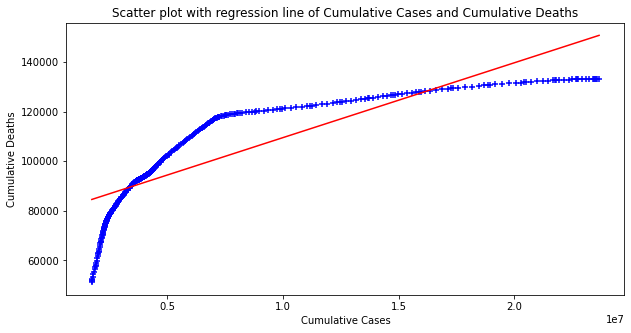

In [21]:
fig, ax = plt.subplots(figsize=(10, 5)) 
plt.scatter(df3['Cumulative_cases'],df3['Cumulative_deaths'], color="blue", marker="+")
plt.plot(X,LR.predict(X), color="red")
plt.ylabel('Cumulative Deaths')
plt.xlabel('Cumulative Cases')
plt.title("Scatter plot with regression line of Cumulative Cases and Cumulative Deaths")
plt.show()

In [22]:
x = sm.add_constant(df3['Cumulative_cases'].to_numpy())
Y = df3['Cumulative_deaths'].to_numpy()
LR1 = sm.OLS(Y, x)
model2 = LR1.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1224.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          2.61e-133
Time:                        08:06:04   Log-Likelihood:                -5057.4
No. Observations:                 475   AIC:                         1.012e+04
Df Residuals:                     473   BIC:                         1.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.926e+04    718.961    110.241      0.0

## <font color=#00B0BA> Uji Asumsi Klasik

Dari summary OLS Regression di atas, dapat dilakukan uji asumsi klasik auto-correlation dan normality.

1. Test statistik durbin watson digunakan untuk mendeteksi autocorrelation pada residual dalam analisis regresi. Dari summary di atas dapat dilihat bahwa nilai dari Durbin Watson sebesar 0.001 menandakan bahwa ada autokorelasi pada residual karena hasil dari Durbin Watson tidak ada berada di rentang toleransi interval nilai DW 1,5 - 2,5 (rule of thumb).
2. Jarque-Bera test dengan alpha 5%, H0: distribusi dari residual adalah distribusi normal, H1: distribusi dari residual bukan distribusi normal. Dari hasil di atas dapat dilihat bahwa Probabilitas dari Jarque-Bera lebih kecil daripada alpha (0.05), sehingga H0 ditolak dan dapat disimpulkan bahwa distribusi residual tidak normal.

### <font color=#B30019>Heteroscedasticity test

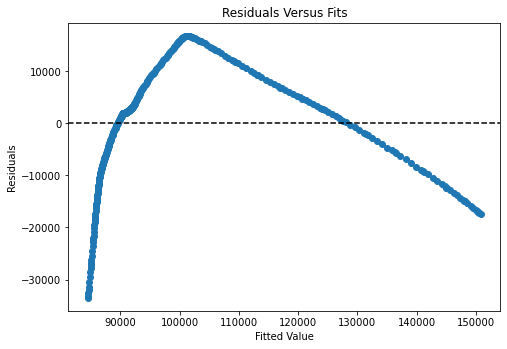

In [23]:
fitted = 79259.15305627784 + (0.0030237873953954664 * df3.Cumulative_cases) 
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df3["Cumulative_deaths"]  - fitted, marker = "o")
plt.show()

From the visualization above we can conclude that the residuals are not distributed with equal variance or in other words heteroscedasticity is present

### <font color=#B30019>Linearity test

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


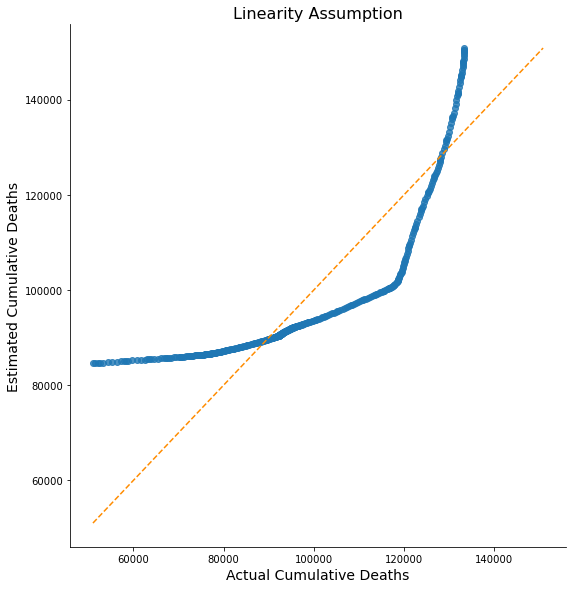

In [24]:
sns.lmplot(x='Cumulative_deaths', y='Estimated Cumulative Deaths', data=df3, fit_reg=False, size=8)
    
# Plotting the diagonal line
line_coords = np.arange(df3[['Cumulative_deaths', 'Estimated Cumulative Deaths']].min().min()-10, 
                        df3[['Cumulative_deaths','Estimated Cumulative Deaths']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Estimated Cumulative Deaths', fontsize=14)
plt.xlabel('Actual Cumulative Deaths', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

Plot sebar menunjukkan titik sisa yang tersebar tidak merata di sekitar garis diagonal, sehingga kita tidak dapat mengasumsikan bahwa ada hubungan linier antara variabel independen dan dependen.

Dari uji asumsi klasik yang telah dilakukan dapat dilihat bawa:

- Distribusi dari residual tidak berdistribusi normal
- Terdapat heteroscedasticity
- Tidak terdapat hubungan linear antara dependen variabel dan independen variabel
- Terdapat auto-correlation mengingat bahwa data yang digunakan adalah data time-series

Berdasarkan hasil uji asumsi klasik di atas, dapat dikatakan bahwa pemodelan ini memiliki performa yang kurang baik untuk memprediksi Cumulative deaths berdasarkan Cumulative cases. Oleh karena itu, dalam melakukan pemodelan perlu dilakukan transformasi supaya model dapat menjadi lebih akurat. 

Dalam hal ini kami menggunakan **log reciprocal** karena:
- Pada awalnya Cumulative Deaths mengalami kenaikan dengan tingkat kenaikan, tetapi setelah itu grafik meningkat pada tingkat yang menurun
- Linear in parameter but non linear in variable

## <font color=#00B0BA>Transformasi

Log-Reciprocal Formula: 

**lnY = B1 - B2 (1/X)**

In [25]:
df4 = df3[['Cumulative_cases','Cumulative_deaths']]
df4

,Cumulative_cases,Cumulative_deaths
65806,1754442,51068
65807,1764716,51483
65808,1774734,52074
65809,1783570,52570
65810,1797879,53347
...,...,...
66276,23443414,133279
66277,23490420,133284
66278,23520187,133290
66279,23550701,133296


### <font color=#B30019>Transform X (Cumulative Cases)

In [26]:
df4['Cumulative_cases_trans'] = 1/df4['Cumulative_cases']
df4

C:\Users\user\AppData\Local\Temp/ipykernel_12720/86610853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Cumulative_cases_trans'] = 1/df4['Cumulative_cases']


,Cumulative_cases,Cumulative_deaths,Cumulative_cases_trans
65806,1754442,51068,5.699818e-07
65807,1764716,51483,5.666634e-07
65808,1774734,52074,5.634647e-07
65809,1783570,52570,5.606733e-07
65810,1797879,53347,5.562110e-07
...,...,...,...
66276,23443414,133279,4.265590e-08
66277,23490420,133284,4.257055e-08
66278,23520187,133290,4.251667e-08
66279,23550701,133296,4.246158e-08


### <font color=#B30019>Transform Y (Cumulative Deaths)

In [27]:
df4['Cumulative_deaths_trans'] = np.log(df4['Cumulative_deaths'])
df4

C:\Users\user\AppData\Local\Temp/ipykernel_12720/553524543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Cumulative_deaths_trans'] = np.log(df4['Cumulative_deaths'])


,Cumulative_cases,Cumulative_deaths,Cumulative_cases_trans,Cumulative_deaths_trans
65806,1754442,51068,5.699818e-07,10.840913
65807,1764716,51483,5.666634e-07,10.849007
65808,1774734,52074,5.634647e-07,10.860421
65809,1783570,52570,5.606733e-07,10.869901
65810,1797879,53347,5.562110e-07,10.884573
...,...,...,...,...
66276,23443414,133279,4.265590e-08,11.800200
66277,23490420,133284,4.257055e-08,11.800237
66278,23520187,133290,4.251667e-08,11.800282
66279,23550701,133296,4.246158e-08,11.800327


## <font color=#00B0BA> Linear Regression

### <font color=#B30019> Create and Fit Model

In [28]:
X1 = df4[['Cumulative_cases_trans']]
y1 = df4[['Cumulative_deaths_trans']]

In [29]:
model1 = LR.fit(X1,y1) # membuat model dari linear regression berdasarkan independent and dependent variable
r_sq1 = model.score(X1, y1)

In [30]:
print('Coefficient of determination (R^2):', r_sq1)  #mengeluarkan hasil perhitungannya dengan template
print('intercept:', model1.intercept_[0])
print('slope:', model1.coef_[0][0])

Coefficient of determination (R^2): 0.9869574786123121
intercept: 11.869318726865998
slope: -1610843.8268629462


The result of coefficient determination after transformation shows that 98.69% of the total variation in cumulative deaths is explained by cumulative cases. This figure is very high as it closest to 100%.

Persamaan regresi linear setelah di transformasi:

ln(Y) = B0 - B1 (1/X)

**ln (Y) = 11.87 - 1610843.83 (1/Cumulative Cases)**

### <font color=#B30019>Predict Response

In [31]:
H = model1.predict(X1)
df4['Estimated Deaths Transformation'] = H
df4

C:\Users\user\AppData\Local\Temp/ipykernel_12720/675368469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Estimated Deaths Transformation'] = H


,Cumulative_cases,Cumulative_deaths,Cumulative_cases_trans,Cumulative_deaths_trans,Estimated Deaths Transformation
65806,1754442,51068,5.699818e-07,10.840913,10.951167
65807,1764716,51483,5.666634e-07,10.849007,10.956512
65808,1774734,52074,5.634647e-07,10.860421,10.961665
65809,1783570,52570,5.606733e-07,10.869901,10.966162
65810,1797879,53347,5.562110e-07,10.884573,10.973350
...,...,...,...,...,...
66276,23443414,133279,4.265590e-08,11.800200,11.800607
66277,23490420,133284,4.257055e-08,11.800237,11.800744
66278,23520187,133290,4.251667e-08,11.800282,11.800831
66279,23550701,133296,4.246158e-08,11.800327,11.800920


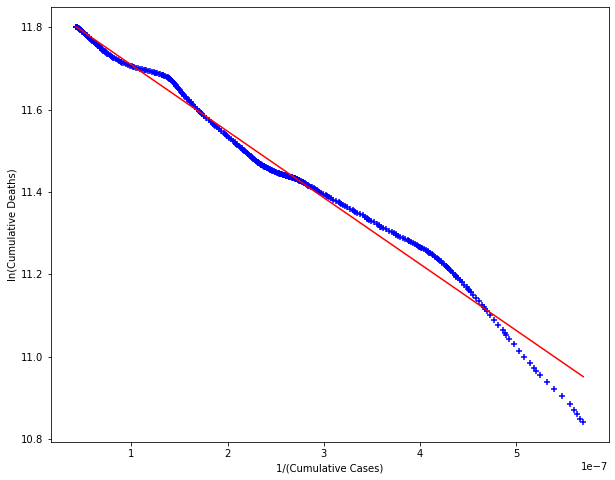

In [32]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.scatter(df4['Cumulative_cases_trans'],df4['Cumulative_deaths_trans'], color="blue", marker="+")
plt.plot(X1,LR.predict(X1), color="red")
plt.ylabel('ln(Cumulative Deaths)')
plt.xlabel('1/(Cumulative Cases)')
plt.show()

### <font color=#B30019>Mengembalikan model dalam Y* = B0 + B1 X*

- Y* = ln(Cumulative Deaths)
- B0 = B0
- B1 = B1
- X* = 1/Cumulative Cases

ln(cumulative deaths) = B0 - B1 * (1/Cumulative Cases)

Cumulative deaths = exp(B0 - (B1*(1/Cumulative Cases))

In [33]:
df4['Estimated Death'] = np.exp((model1.intercept_[0])+(model1.coef_[0][0]*df4['Cumulative_cases_trans'])) 
df4

,Cumulative_cases,Cumulative_deaths,Cumulative_cases_trans,Cumulative_deaths_trans,Estimated Deaths Transformation,Estimated Death
65806,1754442,51068,5.699818e-07,10.840913,10.951167,57020.553601
65807,1764716,51483,5.666634e-07,10.849007,10.956512,57326.166614
65808,1774734,52074,5.634647e-07,10.860421,10.961665,57622.307674
65809,1783570,52570,5.606733e-07,10.869901,10.966162,57881.996436
65810,1797879,53347,5.562110e-07,10.884573,10.973350,58299.555013
...,...,...,...,...,...,...
66276,23443414,133279,4.265590e-08,11.800200,11.800607,133333.225463
66277,23490420,133284,4.257055e-08,11.800237,11.800744,133351.559721
66278,23520187,133290,4.251667e-08,11.800282,11.800831,133363.133466
66279,23550701,133296,4.246158e-08,11.800327,11.800920,133374.968324


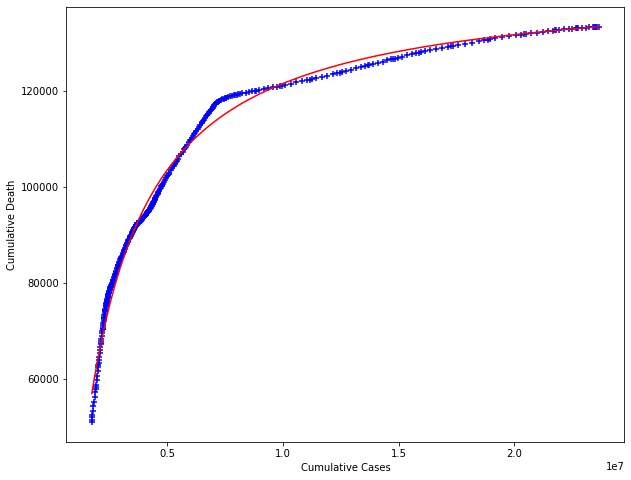

In [34]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.scatter(df4['Cumulative_cases'],df4['Cumulative_deaths'], color="blue", marker="+")
plt.plot(df4['Cumulative_cases'],df4['Estimated Death'], color="red")
plt.ylabel('Cumulative Death')
plt.xlabel('Cumulative Cases')
plt.show()

From the visualization above, we can see that in Germany a higher Cumulative Cases is associated with higher Cumulative Deaths. In addition, there are still some estimates that deviate from the actual data at some point.

In [35]:
x5 = sm.add_constant(df4['Cumulative_cases_trans'].to_numpy())
Y5 = df4['Cumulative_deaths_trans'].to_numpy()
LR5 = sm.OLS(Y5, x5)
model5 = LR5.fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.579e+04
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:06:05   Log-Likelihood:                 1114.3
No. Observations:                 475   AIC:                            -2225.
Df Residuals:                     473   BIC:                            -2216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8693      0.002   5083.951      0.0

## <font color=#00B0BA> Conclusion 

Transformasi dengan log reciprocal dapat digunakan pada data yang awalnya variabel Y meningkat dengan tingkat kenaikan tertentu, tetapi setelah itu meningkat pada tingkat yang menurun.